# Imports

In [186]:
# my module
import acquire as aq

# other imports
import pandas as pd
import numpy as np
import requests
import math
import os

# viz
import matplotlib.pyplot as plt

# datetime
from datetime import datetime

# dataset
from vega_datasets import data


# Data Acquisition Exercises

**Setup**
* url (base + endpoint)
* empty list
Loop
* make a request
* handle the response, add to the list
* find the next url endpoint
    * if it's None, stop looping
    * if it's a string, use it to construct the next url
* Turn the list into a dataframe

## 1. Using the code from the lesson as a guide and the REST API from https://swapi.dev/ as we did in the lesson, create a dataframe named people that has all of the data for people.

In [61]:
ppl_df = aq.star_wars('people/', 'results')
ppl_df.head()

Query Completed for People...
CSV File Found, Loading...


,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"['https://swapi.dev/api/films/1/', 'https://sw...",[],"['https://swapi.dev/api/vehicles/14/', 'https:...","['https://swapi.dev/api/starships/12/', 'https...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,NaN,gold,yellow,112BBY,NaN,https://swapi.dev/api/planets/1/,"['https://swapi.dev/api/films/1/', 'https://sw...",['https://swapi.dev/api/species/2/'],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,NaN,"white, blue",red,33BBY,NaN,https://swapi.dev/api/planets/8/,"['https://swapi.dev/api/films/1/', 'https://sw...",['https://swapi.dev/api/species/2/'],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,"['https://swapi.dev/api/films/1/', 'https://sw...",[],[],['https://swapi.dev/api/starships/13/'],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/
4,Leia Organa,150,49,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,"['https://swapi.dev/api/films/1/', 'https://sw...",[],['https://swapi.dev/api/vehicles/30/'],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/


## 2. Do the same thing, but for planets.

In [62]:
plt_df = aq.star_wars('planets/', 'results')
plt_df.head()

Query Completed for Planets...
CSV File Found, Loading...


,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films,created,edited,url
0,Tatooine,23,304,10465,arid,1 standard,desert,1,200000,"['https://swapi.dev/api/people/1/', 'https://s...","['https://swapi.dev/api/films/1/', 'https://sw...",2014-12-09T13:50:49.641000Z,2014-12-20T20:58:18.411000Z,https://swapi.dev/api/planets/1/
1,Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40,2000000000,"['https://swapi.dev/api/people/5/', 'https://s...","['https://swapi.dev/api/films/1/', 'https://sw...",2014-12-10T11:35:48.479000Z,2014-12-20T20:58:18.420000Z,https://swapi.dev/api/planets/2/
2,Yavin IV,24,4818,10200,"temperate, tropical",1 standard,"jungle, rainforests",8,1000,[],['https://swapi.dev/api/films/1/'],2014-12-10T11:37:19.144000Z,2014-12-20T20:58:18.421000Z,https://swapi.dev/api/planets/3/
3,Hoth,23,549,7200,frozen,1.1 standard,"tundra, ice caves, mountain ranges",100,unknown,[],['https://swapi.dev/api/films/2/'],2014-12-10T11:39:13.934000Z,2014-12-20T20:58:18.423000Z,https://swapi.dev/api/planets/4/
4,Dagobah,23,341,8900,murky,NaN,"swamp, jungles",8,unknown,[],"['https://swapi.dev/api/films/2/', 'https://sw...",2014-12-10T11:42:22.590000Z,2014-12-20T20:58:18.425000Z,https://swapi.dev/api/planets/5/


## 3. Extract the data for starships.

In [63]:
ship_df = aq.star_wars('starships/', 'results')
ship_df.head()

Query Completed for Starships...
CSV File Found, Loading...


,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class,pilots,films,created,edited,url
0,CR90 corvette,CR90 corvette,Corellian Engineering Corporation,3500000,150,950,30-165,600,3000000,1 year,2.0,60,corvette,[],"['https://swapi.dev/api/films/1/', 'https://sw...",2014-12-10T14:20:33.369000Z,2014-12-20T21:23:49.867000Z,https://swapi.dev/api/starships/2/
1,Star Destroyer,Imperial I-class Star Destroyer,Kuat Drive Yards,150000000,"1,600",975,"47,060",NaN,36000000,2 years,2.0,60,Star Destroyer,[],"['https://swapi.dev/api/films/1/', 'https://sw...",2014-12-10T15:08:19.848000Z,2014-12-20T21:23:49.870000Z,https://swapi.dev/api/starships/3/
2,Sentinel-class landing craft,Sentinel-class landing craft,"Sienar Fleet Systems, Cyngus Spaceworks",240000,38,1000,5,75,180000,1 month,1.0,70,landing craft,[],['https://swapi.dev/api/films/1/'],2014-12-10T15:48:00.586000Z,2014-12-20T21:23:49.873000Z,https://swapi.dev/api/starships/5/
3,Death Star,DS-1 Orbital Battle Station,"Imperial Department of Military Research, Sien...",1000000000000,120000,NaN,"342,953","843,342",1000000000000,3 years,4.0,10,Deep Space Mobile Battlestation,[],['https://swapi.dev/api/films/1/'],2014-12-10T16:36:50.509000Z,2014-12-20T21:26:24.783000Z,https://swapi.dev/api/starships/9/
4,Millennium Falcon,YT-1300 light freighter,Corellian Engineering Corporation,100000,34.37,1050,4,6,100000,2 months,0.5,75,Light freighter,"['https://swapi.dev/api/people/13/', 'https://...","['https://swapi.dev/api/films/1/', 'https://sw...",2014-12-10T16:59:45.094000Z,2014-12-20T21:23:49.880000Z,https://swapi.dev/api/starships/10/


## 4. Save the data in your files to local csv files so that it will be faster to access in the future.

In [52]:
# In the function!

## 5. Combine the data from your three separate dataframes into one large dataframe.

In [55]:
all_in_one_df = pd.concat([ppl_df, plt_df, ship_df]).reset_index()
all_in_one_df

,index,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,...,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class,pilots
0,0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,C-3PO,167,75,NaN,gold,yellow,112BBY,NaN,https://swapi.dev/api/planets/1/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,R2-D2,96,32,NaN,"white, blue",red,33BBY,NaN,https://swapi.dev/api/planets/8/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Leia Organa,150,49,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,31,Jedi Interceptor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.47,1500,1,0,60,2 days,1.0,unknown,starfighter,"[https://swapi.dev/api/people/10/, https://swa..."
174,32,arc-170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.5,1000,3,0,110,5 days,1.0,100,starfighter,[]
175,33,Banking clan frigte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,825,unknown,200,unknown,40000000,2 years,1.0,unknown,cruiser,[]
176,34,Belbullab-22 starfighter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.71,1100,1,0,140,7 days,6,unknown,starfighter,"[https://swapi.dev/api/people/10/, https://swa..."


## 6. Acquire the Open Power Systems Data for Germany, which has been rapidly expanding its renewable energy production in recent years. The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017. You can get the data here: https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv

In [589]:
def germany_energy():
    """This function loads or writes a CSV file from a hardcoded URL
    ---
    Format: df = function()
    """
    if os.path.isfile(f"germany.csv"):
        df = pd.read_csv(f"germany.csv", index_col=0)
        print(f"CSV File Found, Loading...")
        
    else:
        print(f"CSV Not Found, Writing Data to CSV...")
        df = pd.read_csv("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")
        df = df.set_index('Date').sort_index()
        
        # write to csv
        df.to_csv(f"germany.csv")
        
    return df

In [591]:
germany = germany_energy()
germany.head()

CSV File Found, Loading...


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

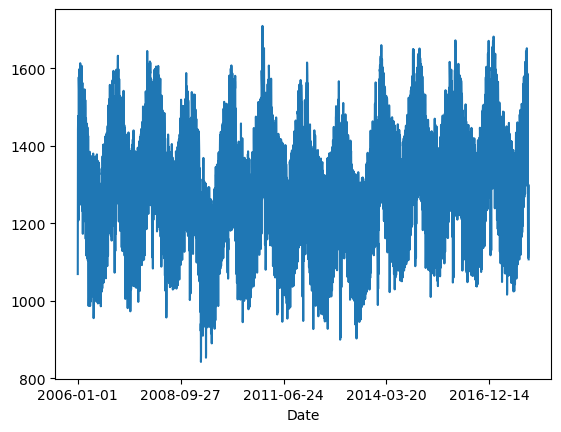

In [592]:
germany.Consumption.plot()

# Time Series Data Exercises

## Misty's Mini Exercise

* Import datetime module from the datetime library
* Convert the date column to datetime
* Subtract one day from each date
* Reformat the dates as "Sun - March 26, 2022"

In [76]:
url = 'https://gist.githubusercontent.com/misty-garcia/\
8c099128d3f59c32afaa5aa2c3e4fb62/raw/2a4c06ea955266e276a78af5d2e1083cfd348703/mockdates'
df = pd.read_csv(url,sep='\t')
df.head()

,date
0,Mar - 27 - 2022
1,May - 22 - 2022
2,May - 16 - 2022
3,Aug - 22 - 2022
4,Mar - 15 - 2022


In [88]:
# converted date to datetime
df.date = pd.to_datetime(df.date)
df.dtypes

date    datetime64[ns]
dtype: object

In [90]:
# subtract one day from each date
df.date = df.date + pd.Timedelta(days=-1)
df.head()

,date
0,2022-03-26
1,2022-05-21
2,2022-05-15
3,2022-08-21
4,2022-03-14


In [91]:
# reformat the dates as "Sun - March 26, 2022"
df.date = df.date.dt.strftime('%a - %B %d, %Y')
df.head()

,date
0,"Sat - March 26, 2022"
1,"Sat - May 21, 2022"
2,"Sun - May 15, 2022"
3,"Sun - August 21, 2022"
4,"Mon - March 14, 2022"


## Temp

In [479]:
# grab the data
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [480]:
# inspect date format
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [481]:
# set date as index
df = df.set_index('date')
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [482]:
# sort the index
df = df.sort_index()

### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [483]:
# resample the day and take the mean
df.resample('D').mean().round(1).head()

,temp
date,
2010-01-01,49.2
2010-01-02,49.3
2010-01-03,49.4
2010-01-04,49.4
2010-01-05,49.5


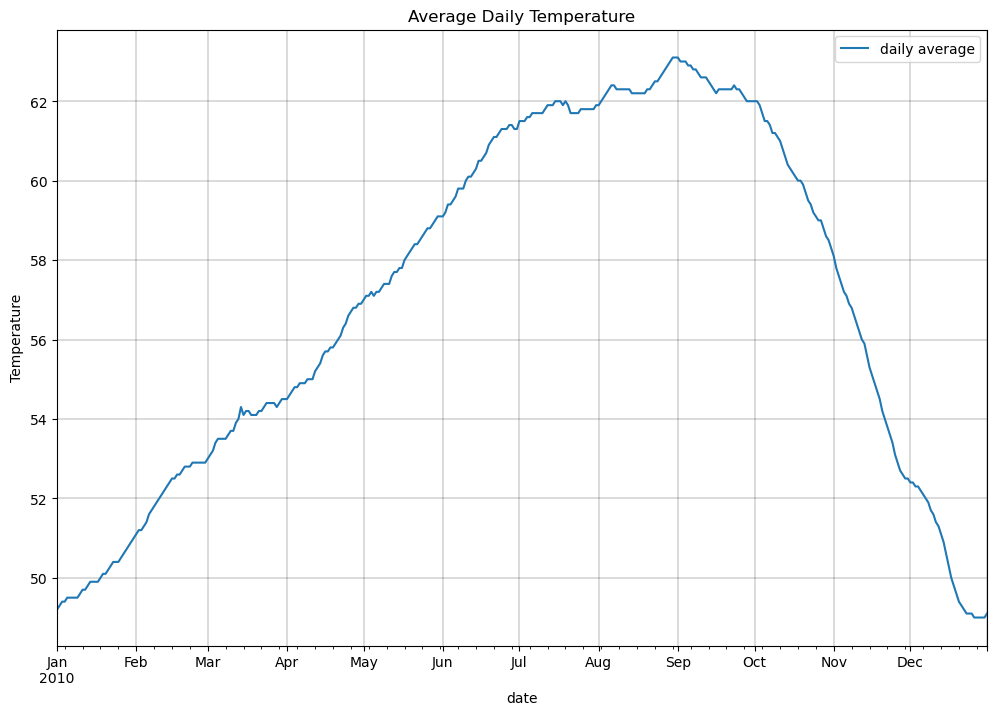

In [484]:
# visualize 

plt.figure(figsize=(12,8))
df.resample('D').mean().round(1).temp.plot(label='daily average')
plt.ylabel('Temperature')
plt.title('Average Daily Temperature')
plt.legend()
plt.grid(color='black', linestyle='-', linewidth=.2)
plt.show()

### 2. Write the code necessary to visualize the minimum temperature over time.

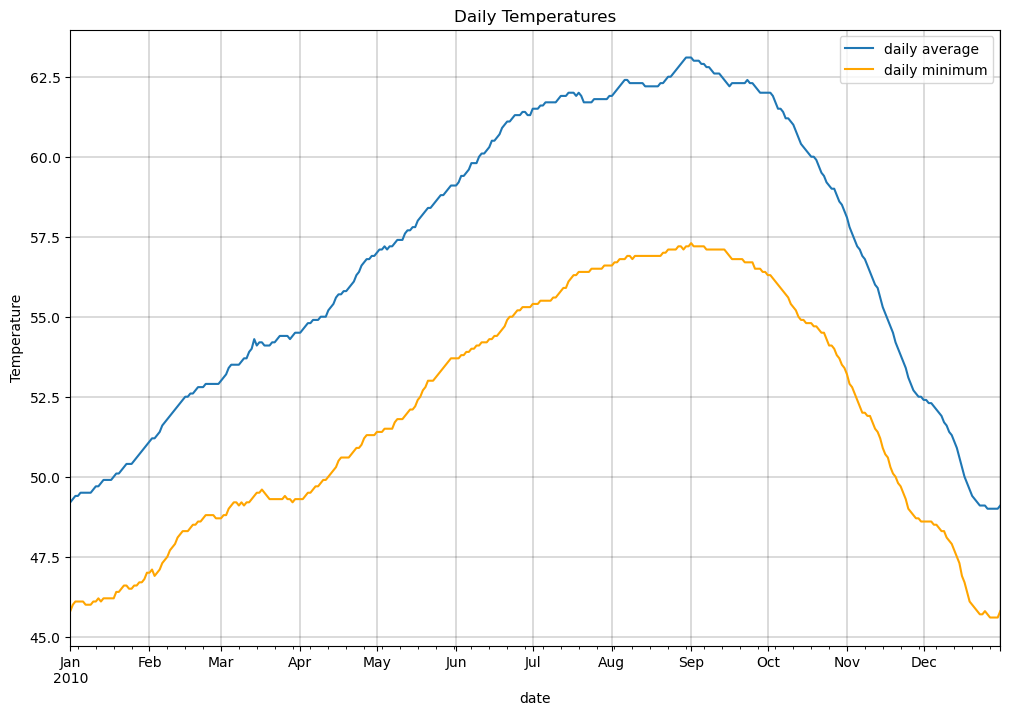

In [485]:
# visualize 

plt.figure(figsize=(12,8))
df.resample('D').mean().round(1).temp.plot(label='daily average')
df.resample('D').agg('min').round(1).temp.plot(label='daily minimum', color='orange')
plt.ylabel('Temperature')
plt.title('Daily Temperatures')
plt.legend()
plt.grid(color='black', linestyle='-', linewidth=.2)
plt.show()

### 3. Write the code necessary to visualize the maximum temperature over time.

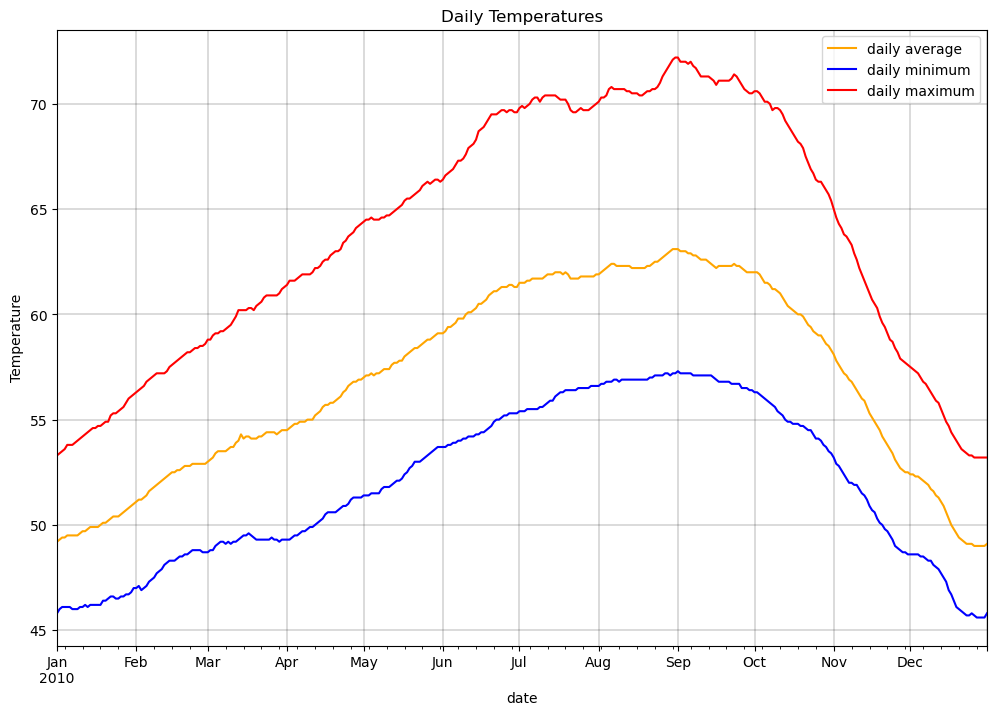

In [486]:
# visualize 

plt.figure(figsize=(12,8))
df.resample('D').mean().round(1).temp.plot(label='daily average', color='orange')
df.resample('D').agg('min').round(1).temp.plot(label='daily minimum', color='blue')
df.resample('D').agg('max').round(1).temp.plot(label='daily maximum', color='red')
plt.ylabel('Temperature')
plt.title('Daily Temperatures')
plt.legend()
plt.grid(color='black', linestyle='-', linewidth=.2)
plt.show()

### 4. Which month is the coldest, on average?

In [491]:
# get the daily mean - January
df.resample('M').mean().round(2).sort_values(by='temp').head(1)

,temp
date,
2010-01-31,49.98


### 5. Which month has the highest average temperature?

In [494]:
# get the daily mean - September
df.resample('M').mean().round(2).sort_values(by='temp', ascending=False).head(1)

,temp
date,
2010-09-30,62.49


### 6. Resample by the day and calculate the min and max temp for the day 
* (Hint: .agg(['min', 'max'])). 
* Use this resampled dataframe to calculate the change in temperature for the day.
* Which month has the highest daily temperature variability?

In [209]:
df_temp = df.resample('D').agg(['min', 'max'])
df_temp.head()

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

In [235]:
df_temp['delta'] = df_temp.apply(lambda row: ((row.temp.max()) - (row.temp.min())),axis=1)
df_temp.head()

temp       delta
             min   max      
date                        
2010-01-01  45.8  53.3   7.5
2010-01-02  46.0  53.4   7.4
2010-01-03  46.1  53.5   7.4
2010-01-04  46.1  53.6   7.5
2010-01-05  46.1  53.8   7.7

In [517]:
# resample to month and then idxmax locate the max - August
df_temp.resample('M').max()['delta'].idxmax()

Timestamp('2010-08-31 00:00:00', freq='M')

#### misty's way

In [505]:
# mistys way
df_daily = df.resample('D').agg(['min', 'max'])
df_daily.head()

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

In [508]:
df_daily['diff'] = df_daily.temp['max'] - df_daily.temp['min']

In [518]:
df_daily.resample('M').max()['diff'].sort_values().tail(1)

date
2010-08-31    15.0
Name: diff, dtype: float64

### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

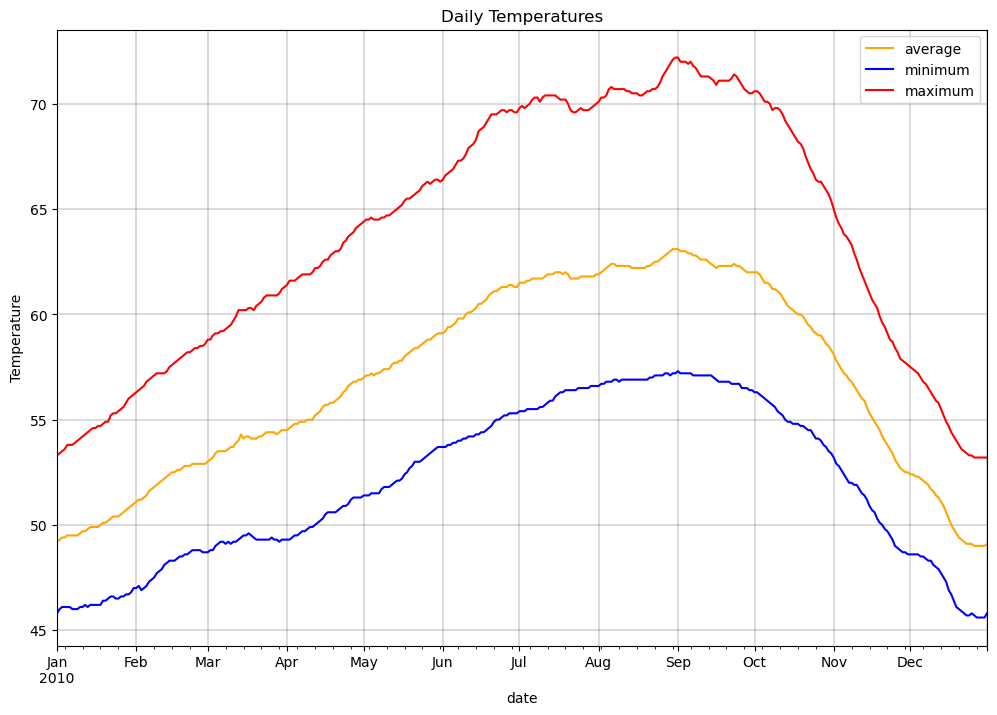

In [520]:
# visualize - I liked it this way becauase I could change the color of each line

plt.figure(figsize=(12,8))
df.resample('D').mean().round(1).temp.plot(label='average', color='orange')
df.resample('D').agg('min').round(1).temp.plot(label='minimum', color='blue')
df.resample('D').agg('max').round(1).temp.plot(label='maximum', color='red')
plt.ylabel('Temperature')
plt.title('Daily Temperatures')
plt.legend()
plt.grid(color='black', linestyle='-', linewidth=.2)
plt.show()

## Seattle Weather

In [522]:
# get data
df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [523]:
# look at data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [524]:
# set and sort index
df = df.set_index('date').sort_index()
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


### 1. Which year and month combination has the highest amount of precipitation?

In [526]:
# meat and potatoes - resample by month, summing precip, sort values, display 1 = 2015 Dec
df.resample('M').precipitation.sum().round(1).sort_values(ascending=False).head(1)

date
2015-12-31    284.5
Name: precipitation, dtype: float64

### 2. Visualize the amount of monthly precipitation over time.

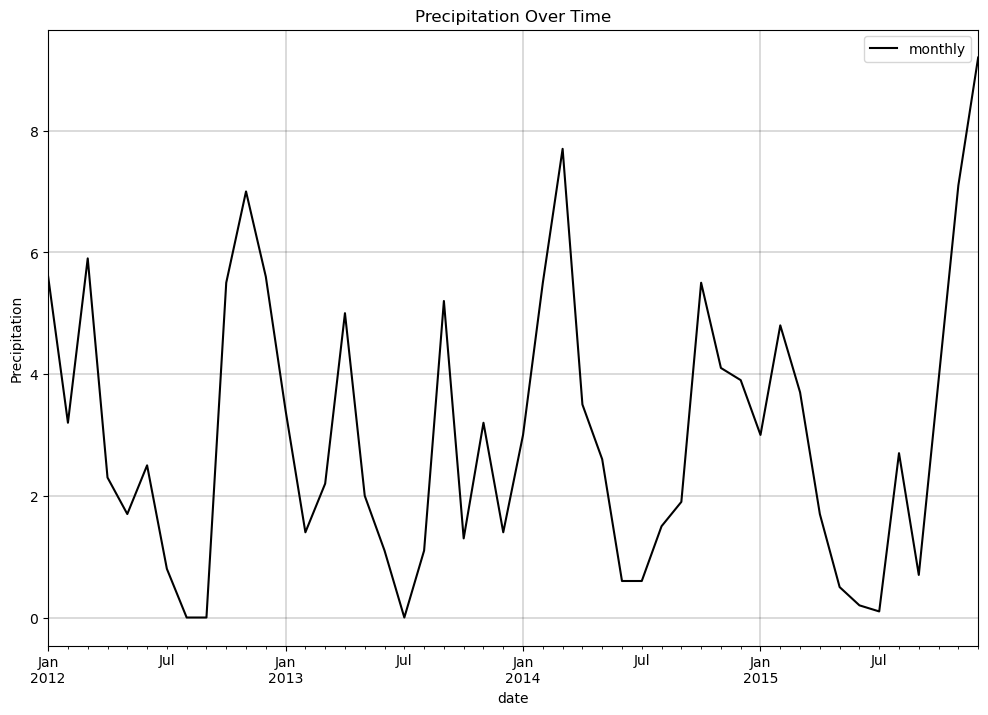

In [263]:
# visualize 

plt.figure(figsize=(12,8))
df.resample('M').mean().round(1).precipitation.plot(label='monthly', color='black')
plt.ylabel('Precipitation')
plt.title('Precipitation Over Time')
plt.legend()
plt.grid(color='black', linestyle='-', linewidth=.2)
plt.show()

### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.


In [532]:
df_wk = df.resample('W').mean().wind.round(1)
df_wk.head()

date
2012-01-01    4.7
2012-01-08    3.4
2012-01-15    3.4
2012-01-22    4.6
2012-01-29    3.9
Freq: W-SUN, Name: wind, dtype: float64

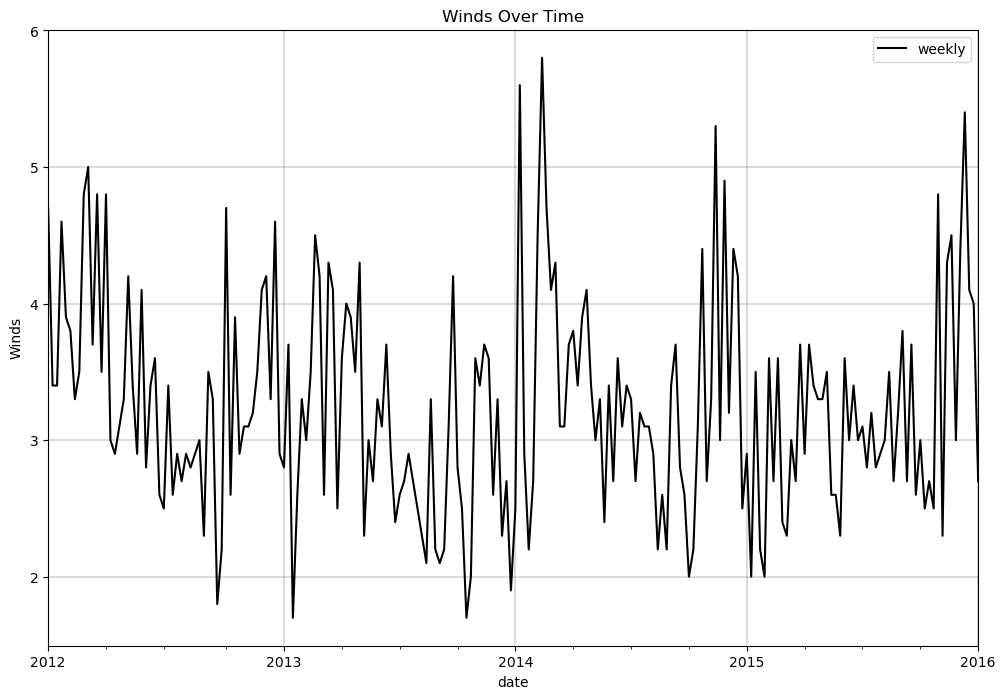

In [533]:
# visualize weekly

plt.figure(figsize=(12,8))
df_wk.plot(label='weekly', color='black')
plt.ylabel('Winds')
plt.title('Winds Over Time')
plt.legend()
plt.grid(color='black', linestyle='-', linewidth=.2)
plt.show()

In [534]:
# make it monthly
df_mth = df.resample('M').mean().wind.round(1)
df_mth.head()

date
2012-01-31    3.9
2012-02-29    3.9
2012-03-31    4.2
2012-04-30    3.4
2012-05-31    3.4
Freq: M, Name: wind, dtype: float64

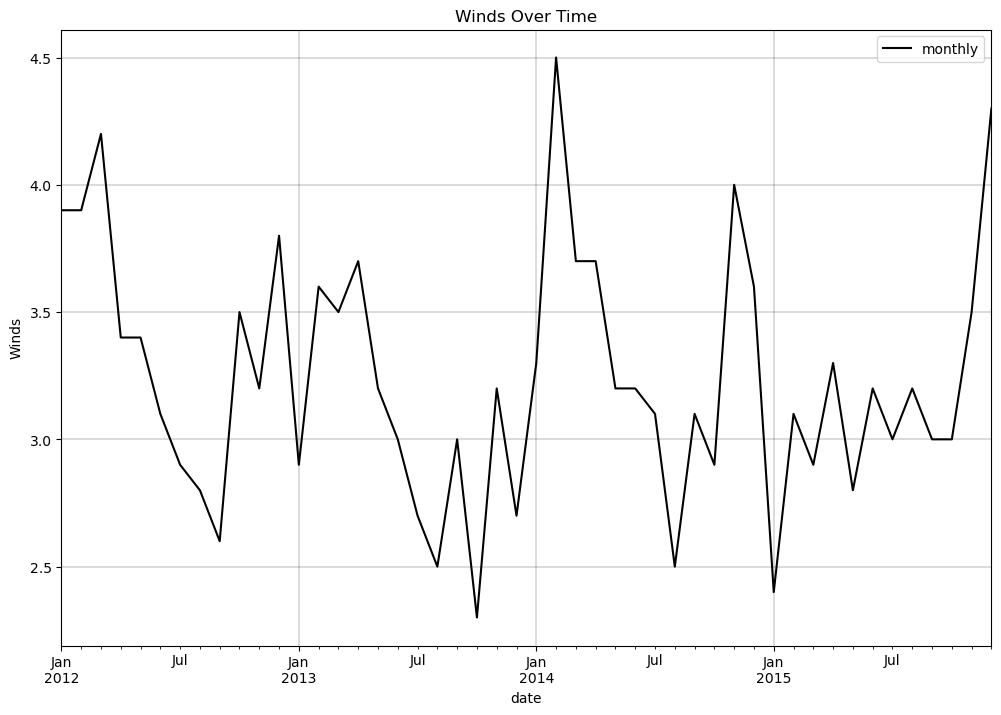

In [535]:
# visualize monthly

plt.figure(figsize=(12,8))
df_mth.plot(label='monthly', color='black')
plt.ylabel('Winds')
plt.title('Winds Over Time')
plt.legend()
plt.grid(color='black', linestyle='-', linewidth=.2)
plt.show()

### 4. Which year-month combination is the windiest?


In [537]:
# resampling and looking at winds - 2015 Dec
df.resample('M').wind.sum().round(1).sort_values(ascending=False).head(1)

date
2015-12-31    134.6
Name: wind, dtype: float64

### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


In [314]:
# resampling and looking at sun - 2014 
df.resample('Y').weather.value_counts().idxmax()

(Timestamp('2014-12-31 00:00:00', freq='A-DEC'), 'sun')

#### mistys/winstons way

In [541]:
# 2014! nice
df [df.weather == 'sun'].index.year.value_counts()

2014    211
2013    205
2015    180
2012    118
Name: date, dtype: int64

### 6. In which month does it rain the most?


In [325]:
# resampling by month and looking at weather - January
df.resample('M').weather.value_counts()

date        weather
2012-01-31  rain       18
            snow        7
            sun         4
            drizzle     2
2012-02-29  rain       17
                       ..
2015-10-31  rain        1
2015-11-30  fog        21
            sun         9
2015-12-31  fog        25
            sun         6
Name: weather, Length: 138, dtype: int64

#### mistys way

In [549]:
df.groupby(df.index.month_name()).sum().precipitation.sort_values().tail(1)

date
November    642.5
Name: precipitation, dtype: float64

### 7. Which month has the most number of days with a non-zero amount of precipitation?


In [559]:
# ## WHAT I WANTED TO DO!!

# # Resample the dataframe monthly
# df_mth = df.resample('M').sum()
# df_mth.head()

# # Define a lambda function to add 1 to a column when precipitation is greater than 0
# add_one = lambda x: x + 1 if df['precipitation'] > 0 else x

# # Apply the lambda function to the desired column of the resampled dataframe
# df_mth['sum_rain_days'] = df_mth.apply(add_one)

In [554]:
# make month column
df['month'] = df.index.month_name()
df.head()

,precipitation,temp_max,temp_min,wind,weather,month
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,January
2012-01-02,10.9,10.6,2.8,4.5,rain,January
2012-01-03,0.8,11.7,7.2,2.3,rain,January
2012-01-04,20.3,12.2,5.6,4.7,rain,January
2012-01-05,1.3,8.9,2.8,6.1,rain,January


In [558]:
# df with precip > 0
df [df.precipitation > 0].groupby('month').count().weather.sort_values().tail(1)

month
December    81
Name: weather, dtype: int64

## Flights

In [560]:
# get the data
df = data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [561]:
# add column to account for day of the week
df['dayofweek'] = df.date.dt.day_of_week

In [562]:
# look at the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
 5   dayofweek    20000 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 937.6+ KB


In [563]:
# set and sort index by date
df = df.set_index('date').sort_index()

### 1. Convert any negative delays to 0.


In [475]:
# convert negative delays to 0
df.loc[df['delay'] < 0, 'delay'] = 0

### 2. Which hour of the day has the highest average delay?


In [476]:
# resample by hour, delay mean, sort and display - 3am
df.resample('H').delay.mean().sort_values(ascending=False).head(1)

date
2001-02-23 03:00:00    360.0
Name: delay, dtype: float64

#### mistys way

In [564]:
# pull out and make new column
df['hour'] = df.index.hour

In [570]:
df.groupby('hour').mean().sort_values(by='delay').tail(1)

,delay,distance,dayofweek
hour,,,
3,302.5,322.0,2.5


### 3. Does the day of the week make a difference in the delay amount?


In [576]:
# check delays for day of week group by - Yes, day of week 4 = Thursday
# Monday is 0 and Sunday is 6
df.groupby(by='dayofweek').delay.sum().sort_values(ascending=False).head(1)

dayofweek
4    47220
Name: delay, dtype: int64

#### mistys way

In [571]:
df['weekday'] = df.index.weekday

In [575]:
df.groupby('weekday').mean().delay.sort_values().tail(1)

weekday
4    15.594452
Name: delay, dtype: float64

### 4. Does the month make a difference in the delay amount?


In [478]:
# doesn't seem to really - February is the worst
df.resample('M').delay.sum().sort_values(ascending=False)

date
2001-02-28    76987
2001-01-31    76670
2001-03-31    68732
Name: delay, dtype: int64

In [577]:
# doesn't seem to really - February is the worst
df.resample('M').delay.mean().sort_values(ascending=False)

date
2001-02-28    9.398338
2001-01-31    8.242630
2001-03-31    6.804310
Name: delay, dtype: float64

In [579]:
df['month'] = df.index.month_name()

In [582]:
df.groupby('month').mean().delay.sort_values().tail(1)

month
February    9.398338
Name: delay, dtype: float64

# Bonus: Iowa Electricity

### 1. For each row, calculate the percentage of the year's total that energy source provided.


In [451]:
df = data.iowa_electricity()
df.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [452]:
# look at the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            51 non-null     datetime64[ns]
 1   source          51 non-null     object        
 2   net_generation  51 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


In [455]:
# year? This is weird...
df.year.value_counts()

2001-01-01    3
2010-01-01    3
2016-01-01    3
2015-01-01    3
2014-01-01    3
2013-01-01    3
2012-01-01    3
2011-01-01    3
2009-01-01    3
2002-01-01    3
2008-01-01    3
2007-01-01    3
2006-01-01    3
2005-01-01    3
2004-01-01    3
2003-01-01    3
2017-01-01    3
Name: year, dtype: int64

In [463]:
df.source.value_counts()

Fossil Fuels      17
Nuclear Energy    17
Renewables        17
Name: source, dtype: int64

### 2. Lineplot of generation over time, color by source


In [469]:
# # visualize monthly

# plt.figure(figsize=(12,8))
# plt.bar(label='Oil', color='black')
# plt.ylabel('Winds')
# plt.title('Winds Over Time')
# plt.legend()
# plt.grid(color='black', linestyle='-', linewidth=.2)
# plt.show()

### 3. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)


### 4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?


### 5. Is the total generation increasing over time?
* How would you control for increasing consumption over time when considering how much energy is coming from each source?
* express each number as a % of the year's total
